# Exemple of naive deconvolution using HST image and Galsim RealGalaxy
v>=26dec25

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as mticker
mpl.rcParams["font.size"] = 16
mpl.rcParams['axes.titlesize'] = 16
plt.rcParams['image.cmap'] = 'RdBu_r'

In [2]:
import galsim

In [3]:
import json
import yaml
from types import SimpleNamespace

In [4]:
config_file = "./config_DeconvNoisy_COSMOS_4nb.yaml"


with open(config_file, "r") as config:
    settings_dict = yaml.safe_load(config)
args = SimpleNamespace(**settings_dict)

In [10]:
gal_orig = galsim.fits.read("./cosmos_exa/gal_naive_decon.fits") # original galaxy image
psf      = galsim.fits.read("./cosmos_exa/psf_naive_decon.fits") # original HST PSF
noise    = galsim.fits.read("./cosmos_exa/noise_naive_decon.fits") # original noise image
with open("./cosmos_exa/infoe_naive_decon.fits", "r") as f:
            info = json.load(f)
            pixel_scale = info["pixel_scale"]  # original pixel_scale
            var = info['var']                  # original noise variance


In [11]:
fov_pixels=48
upsample=4

In [12]:
psf.array = psf.array/psf.array.sum() # adjust flux to 1.0 for HST PSF
psf_hst   = galsim.InterpolatedImage(psf)
gal_rg    = galsim.RealGalaxy((gal_orig,psf,noise,pixel_scale,var))


In [13]:
# Draw PSF images.
psf_image = galsim.ImageF(fov_pixels * upsample, fov_pixels * upsample)
psf_hst.drawImage(psf_image, scale=pixel_scale / upsample, method="auto");



In [14]:
gal_image = galsim.ImageF(fov_pixels * upsample, fov_pixels * upsample)
gal_rg.drawImage(
        gal_image, scale=pixel_scale / upsample, method="auto"
);


In [15]:
def crop_center(arr):
    npix=min(list(arr.shape))
    return arr[arr.shape[0]//2-npix//2:arr.shape[0]//2+npix//2,
        arr.shape[1]//2-npix//2:arr.shape[1]//2+npix//2]

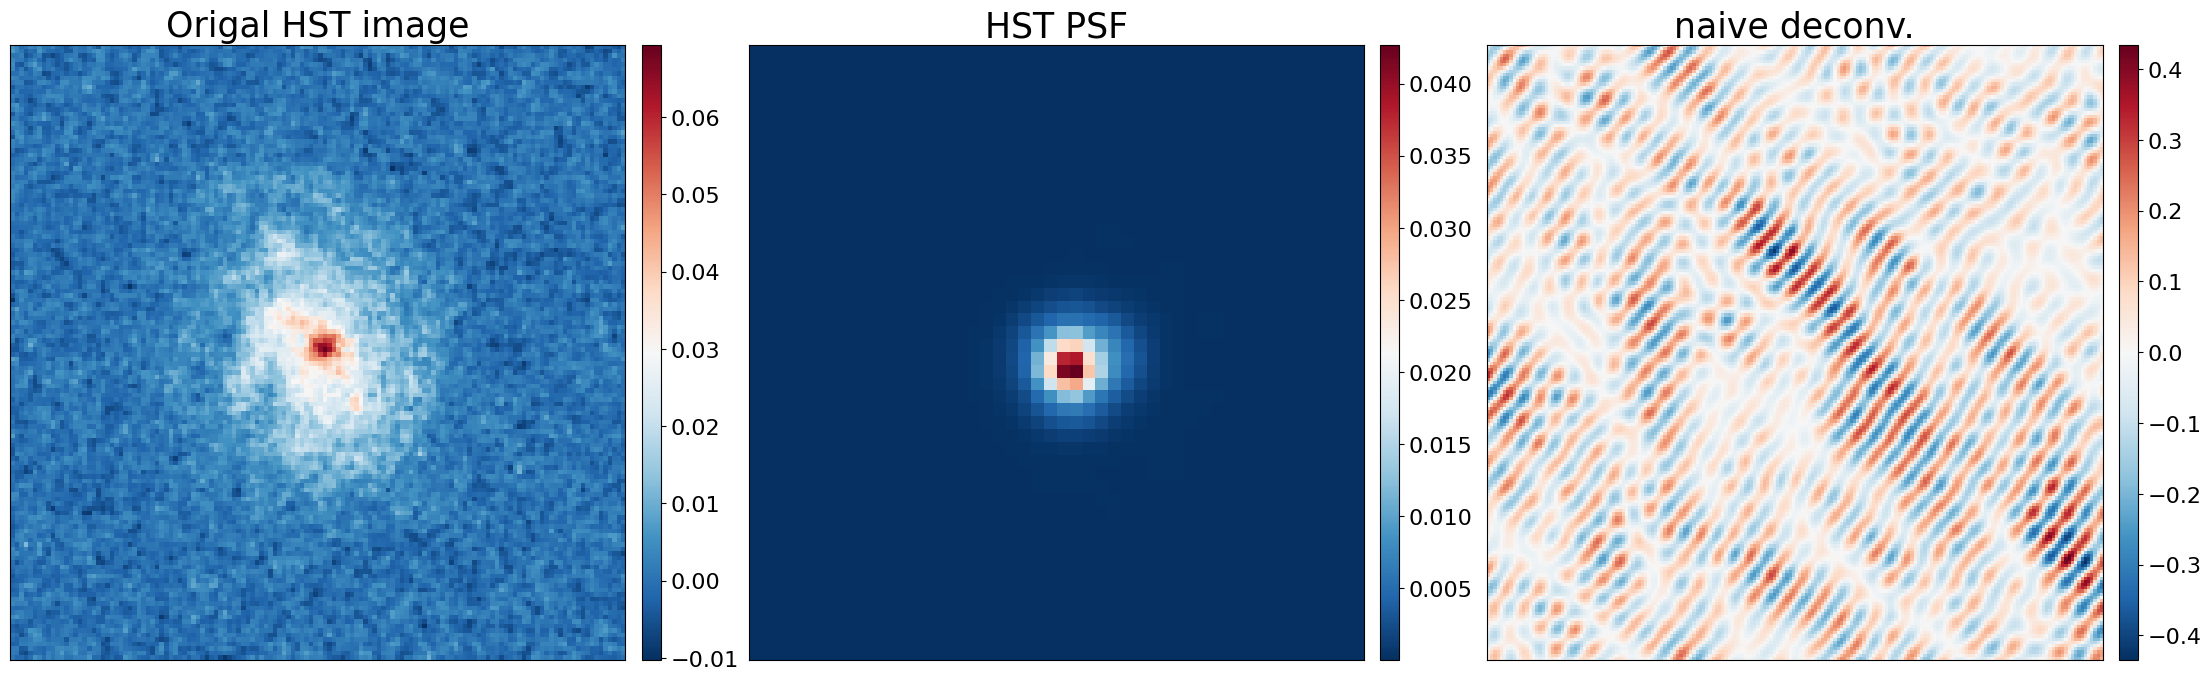

In [16]:
fig,axs=plt.subplots(1,3,figsize=(3*9,9))

im=axs[0].imshow(crop_center(gal_orig.array))
cax = fig.add_axes([axs[0].get_position().x1+6e-3, 
                    axs[0].get_position().y0, 7e-3, 
                    axs[0].get_position().height])
axs[0].set_title("Origal HST image",fontsize=25)

plt.colorbar(im,cax=cax)
im=axs[1].imshow(crop_center(psf.array)) 
cax = fig.add_axes([axs[1].get_position().x1+6e-3, 
                    axs[1].get_position().y0, 7e-3, 
                    axs[1].get_position().height])
axs[1].set_title("HST PSF",fontsize=25)
plt.colorbar(im,cax=cax)
im=axs[2].imshow(crop_center(gal_image.array))
cax = fig.add_axes([axs[2].get_position().x1+6e-3, 
                    axs[2].get_position().y0, 7e-3, 
                    axs[2].get_position().height])
axs[2].set_title("naive deconv.",fontsize=25)
plt.colorbar(im,cax=cax);

axs=axs.ravel()
for ax in axs:
    ax.set(xticks=[], yticks=[])

#fig.savefig("naive_deconv_example.pdf",bbox_inches='tight', pad_inches=0.2)